In [7]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras import preprocessing
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM, Reshape

import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as plt

In [2]:
data = pd.read_csv("colors.csv")
names = data["name"]
data.head()

name  red  green  blue
0           18th Century Green  165    147    68
1               1975 Earth Red  123     70    59
2           1989 Miami Hotline  221     51   102
3  20000 Leagues Under the Sea   25     25   112
4               3AM in Shibuya   34     85   119

In [4]:
names.head()

0             18th Century Green
1                 1975 Earth Red
2             1989 Miami Hotline
3    20000 Leagues Under the Sea
4                 3AM in Shibuya
Name: name, dtype: object

### data preparation

we're using a character level language model.  
we want to reduce the name of colors to max 25 characters to reduce complexity   
the histogram shows us that almost all colors are below 25 chars so we wont be sacrificing too much

In [6]:
h = sorted(names.str.len().values)

In [9]:
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

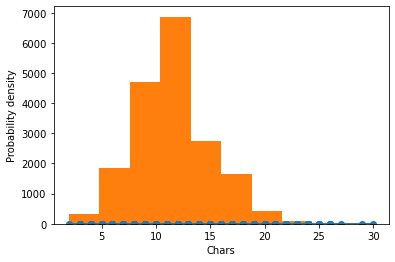

In [12]:
plt.plot(h,fit,'-o')
plt.hist(h)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [15]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
padded_names.shape

(18606, 25)

### one hot encoding

In [17]:
t.word_index

{'e': 1,
 'a': 2,
 ' ': 3,
 'r': 4,
 'i': 5,
 'l': 6,
 'n': 7,
 'o': 8,
 's': 9,
 't': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'b': 17,
 'm': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'j': 25,
 'q': 26,
 'x': 27,
 "'": 28,
 '-': 29,
 'ō': 30,
 'è': 31,
 'é': 32,
 'ā': 33,
 'á': 34,
 'ó': 35,
 'ū': 36,
 '0': 37,
 '8': 38,
 '.': 39,
 'ē': 40,
 'ī': 41,
 'ǎ': 42,
 '!': 43,
 'í': 44,
 '&': 45,
 'ǜ': 46,
 '9': 47,
 '2': 48,
 'à': 49,
 'ǐ': 50,
 '’': 51,
 '6': 52,
 'ú': 53,
 '1': 54,
 '3': 55,
 'â': 56,
 '4': 57,
 'ǔ': 58,
 'ì': 59,
 '7': 60,
 '5': 61,
 'ê': 62,
 'ö': 63,
 'ł': 64,
 'š': 65,
 'ü': 66,
 '₂': 67,
 'ò': 68,
 'ñ': 69,
 'ě': 70,
 'ń': 71,
 'ä': 72,
 'œ': 73,
 'ß': 74,
 '%': 75,
 'ı': 76,
 'ż': 77,
 '/': 78,
 'î': 79,
 'ë': 80,
 '(': 81,
 ')': 82,
 'å': 83,
 '$': 84,
 'я': 85,
 'ő': 86,
 'ğ': 87,
 'ç': 88,
 'ù': 89}

In [18]:
from tensorflow.python.keras.utils import np_utils

In [19]:
one_hot_names = np_utils.to_categorical(padded_names)

In [20]:
one_hot_names.shape

(18606, 25, 90)

### Data Normalization   
Data normalization is purely practical because in practice it could take a model forever to converge if the training data values are spread out too much.

In [22]:
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])

In [24]:
normalized_values

array([[0.64705882, 0.57647059, 0.26666667],
       [0.48235294, 0.2745098 , 0.23137255],
       [0.86666667, 0.2       , 0.4       ],
       ...,
       [0.80392157, 0.83529412, 0.83529412],
       [0.        , 0.5372549 , 0.58823529],
       [0.14117647, 0.54509804, 0.8       ]])